In [21]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from scipy import stats
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#%matplotlib inline

In [6]:
# load the data and visualize it
wine = datasets.load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [7]:
# convert it into pandas df
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [8]:
# wine target values and their counts
df['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [9]:
# checking for datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

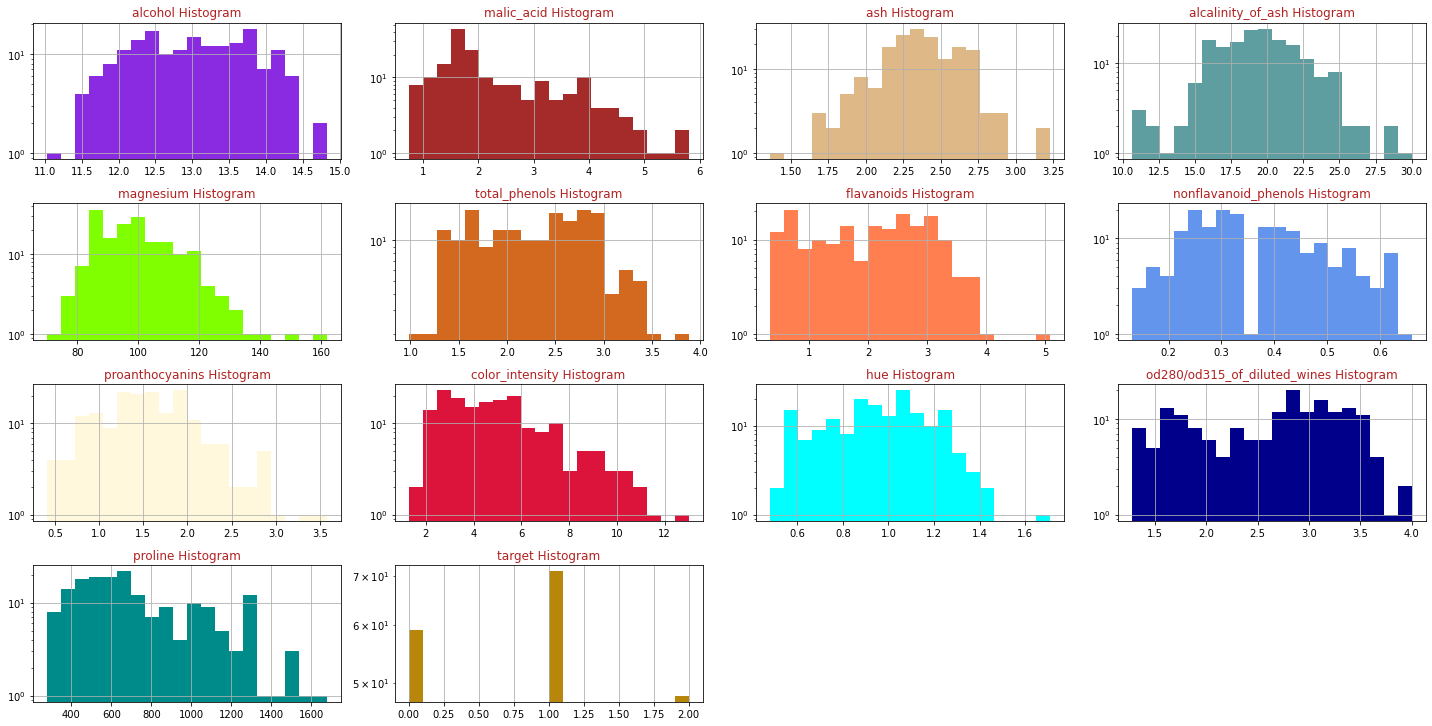

In [10]:
# plot histogram for all values
colors = list(mcolors.CSS4_COLORS.keys())[10:]

def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(df,df.columns,8,4)


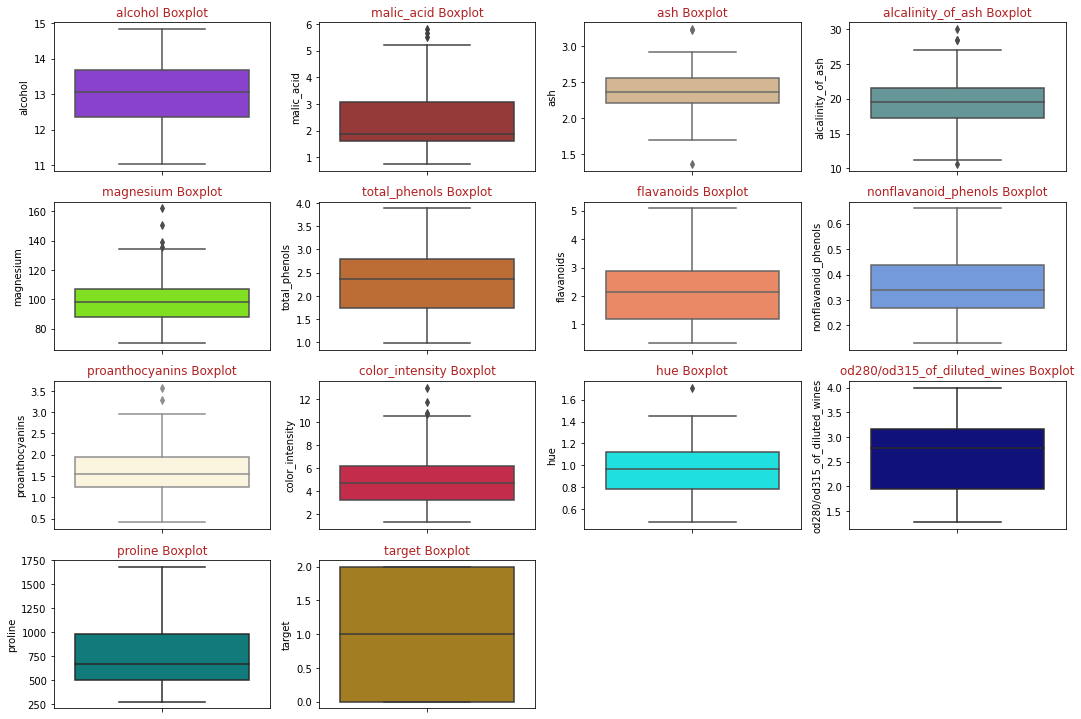

In [11]:

def draw_boxplots(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(15,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.boxplot(y = feature, data = dataframe, ax = ax, color = colors[i])
        ax.set_title(feature+" Boxplot",color=colors[35])
        #ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Boxplots.png')
    plt.show()

draw_boxplots(df,df.columns,8,4)


## Outliers

I will remove all the outliers that have a z-score of 3 or more. This might leave a few outliers that are more or less than $1.24 * IQR$, but it should still remove the outliers that will impact the data the most. Alternatively the IQR method or using a z-score of 2.5 or more could be used.

In [12]:
# dropping outliers
# check z-scores of all values and removes column if z-score is above 3
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


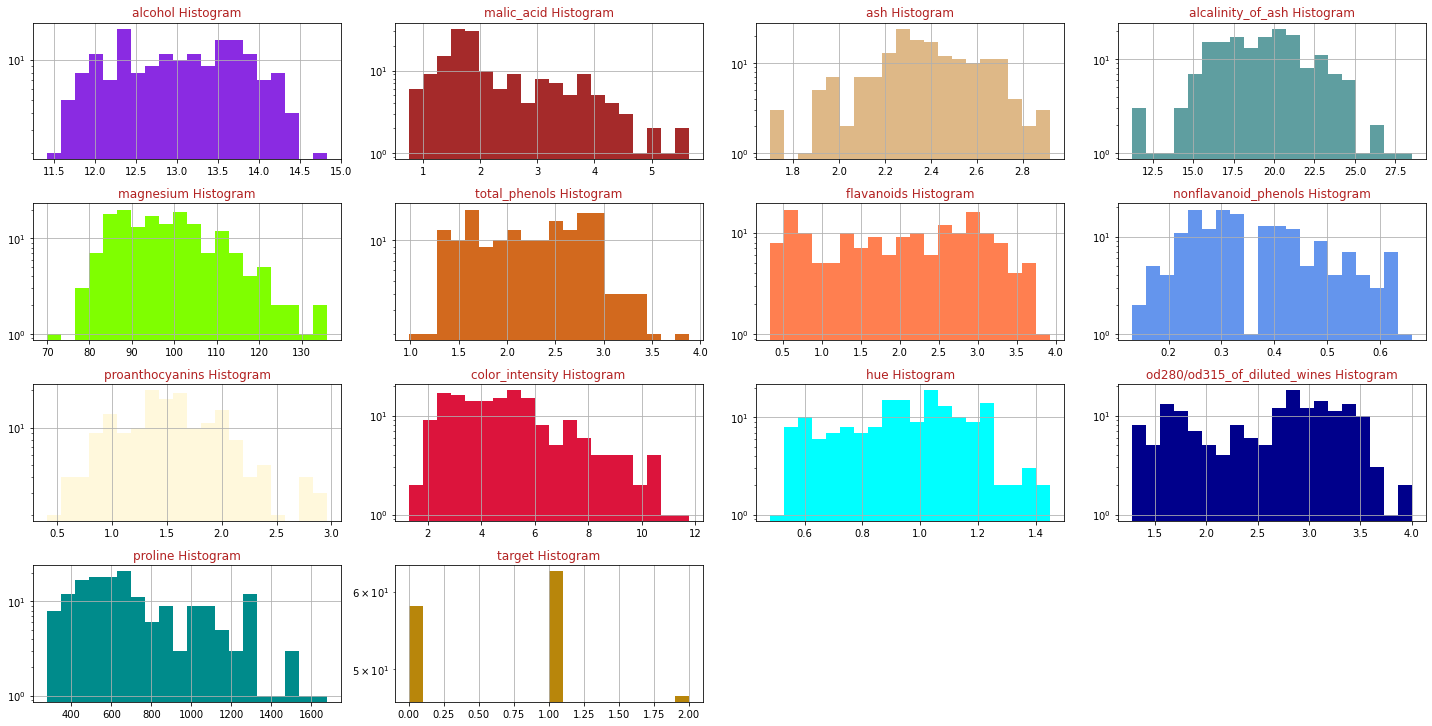

In [13]:
# histograms with outliers removed
draw_histograms(df,df.columns,8,4)

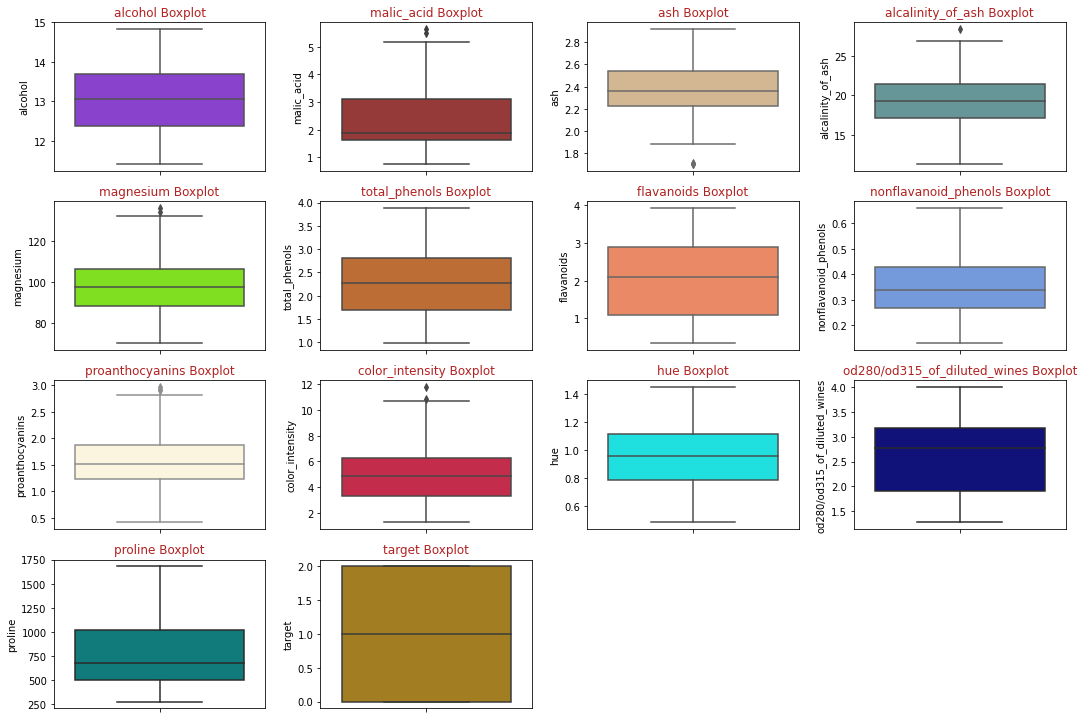

In [14]:
# boxplot with outliers removed
draw_boxplots(df,df.columns,8,4)

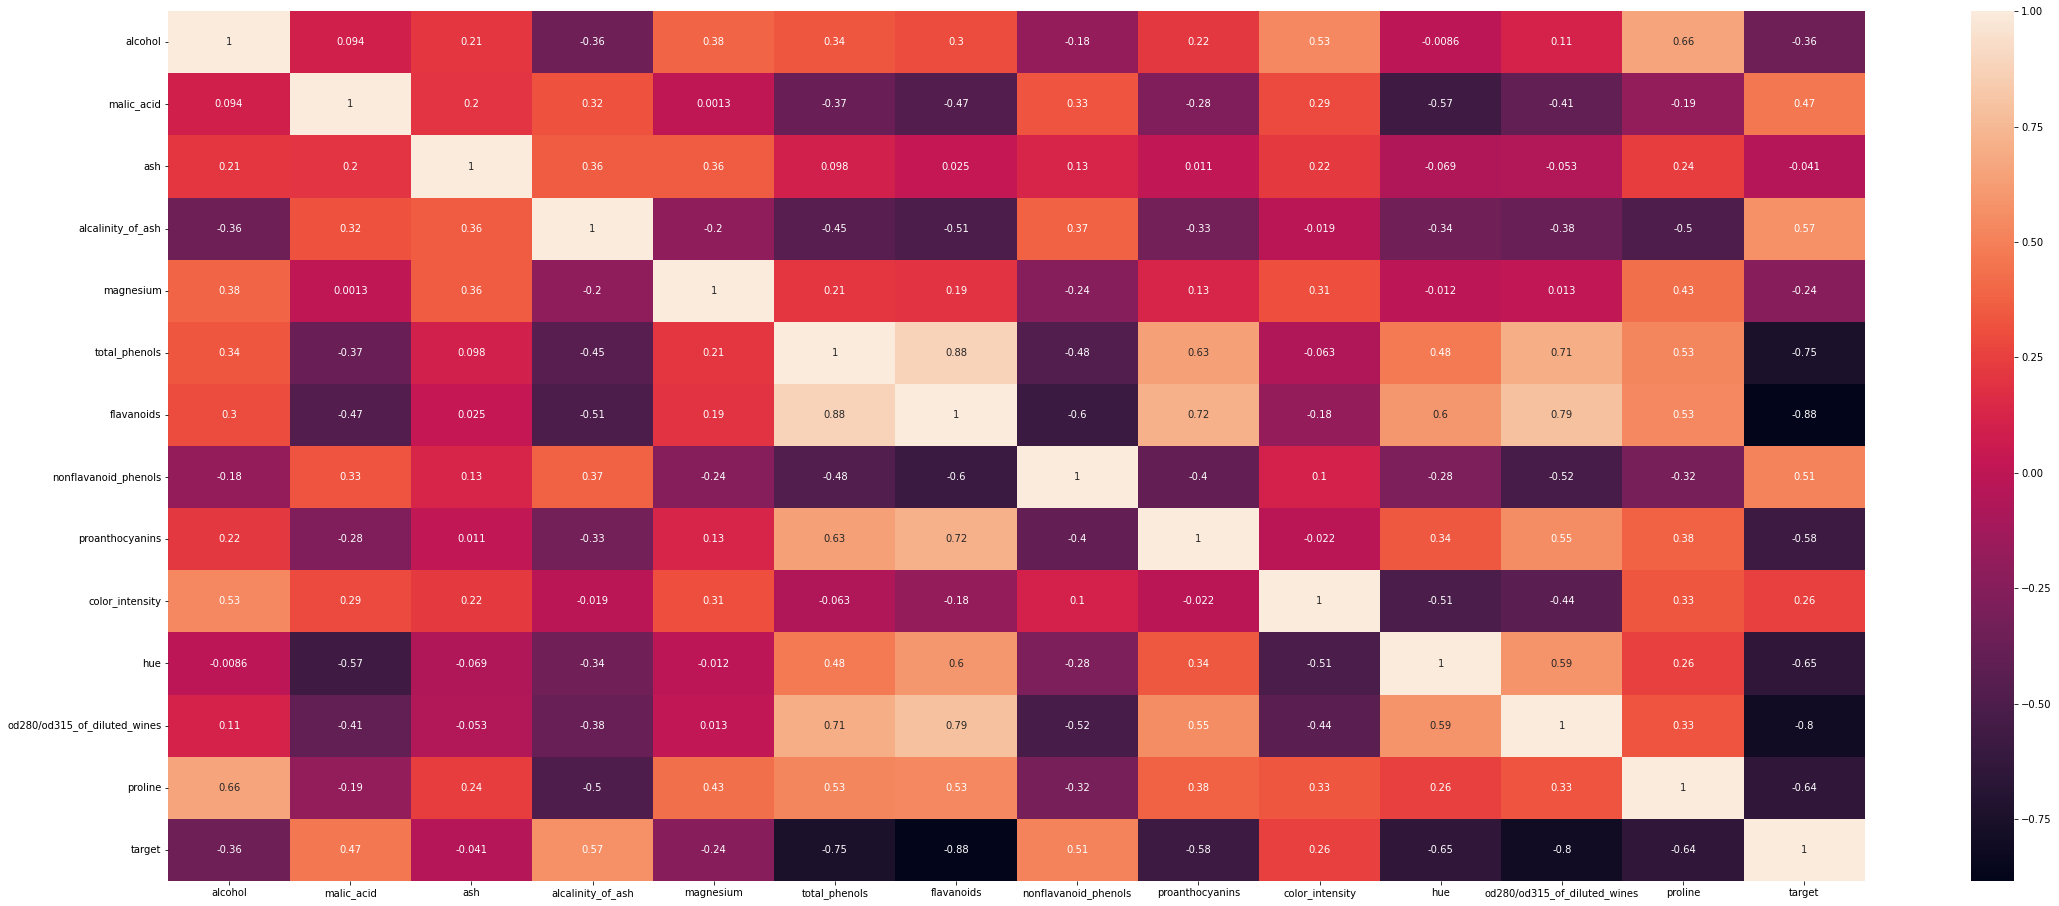

In [15]:
# heatmap of the correlations
plt.figure(figsize = (38,16))
sns.heatmap(df.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

In [37]:
# makign the depedent and idepedent variables
X = df.iloc[:,df.columns != 'target']
Y = df['target']


In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
print(len(Y_train), 'training',len(X_test),'test')

126 training 42 test


In [45]:
gnb = GaussianNB()
nb_output = gnb.fit(X_train,Y_train).predict(X_test)
nb_output


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [46]:
cr = classification_report(Y_test, nb_output, target_names=['Type 0', 'Type 1', 'Type 2'])
print(cr)

              precision    recall  f1-score   support

      Type 0       0.95      1.00      0.97        18
      Type 1       1.00      0.89      0.94        18
      Type 2       0.86      1.00      0.92         6

    accuracy                           0.95        42
   macro avg       0.93      0.96      0.95        42
weighted avg       0.96      0.95      0.95        42

